# Mini-Projeto — Clamed Data Insights
**Autor:** Lucas Becker Barbosa Lima  
**Data de entrega:** 11/11/2025


## 1) Entendimento do Projeto e Importação dos Dados
**Objetivo:** Ler o dataset `healthcare_dataset.csv`, entender sua estrutura e preparar o ambiente.

In [1]:
import pandas as pd

df = pd.read_csv('healthcare_dataset.csv')

df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


## 2) Limpeza e Preparação dos Dados

Nesta etapa, realizo o tratamento dos dados brutos para garantir consistência antes da análise.

A limpeza inclui:
- Verificação e tratamento de valores ausentes
- Remoção de registros duplicados
- Padronização de colunas categóricas (ex.: gênero)
- Identificação de possíveis outliers em colunas numéricas relevantes
- Conversão de colunas para tipos adequados (como datas)

O objetivo é obter um dataset limpo (`df_clean`) e pronto para análises estatísticas e visuais.


In [2]:
import pandas as pd
import numpy as np
from IPython.display import display

# Mantém o df original preservado
df_clean = df.copy()

# ---------- helpers ----------
def pick_col(df, *cands):
    """Retorna a primeira coluna existente dentre as candidatas."""
    for c in cands:
        if c in df.columns:
            return c
    return None

def iqr_bounds(series):
    """Limites inferior e superior pelo método IQR."""
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    return q1 - 1.5 * iqr, q3 + 1.5 * iqr


print(" Valores ausentes por coluna:")
display(df_clean.isna().sum())

# Preenchimento (só se houver NAs)
num_cols = df_clean.select_dtypes(include=[np.number]).columns
cat_cols = df_clean.select_dtypes(exclude=[np.number]).columns

for col in num_cols:
    if df_clean[col].isna().any():
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

for col in cat_cols:
    if df_clean[col].isna().any():
        df_clean[col] = df_clean[col].fillna("Desconhecido")


dup_count = int(df_clean.duplicated().sum())
print(f"\n✅ Registros duplicados encontrados: {dup_count}")
if dup_count > 0:
    df_clean = df_clean.drop_duplicates().reset_index(drop=True)
    print(" Duplicados removidos.")
else:
    print(" Nenhum duplicado encontrado.")


def normalize_gender(value):
    if not isinstance(value, str):
        return value
    v = value.strip().lower()
    if v in ["m", "male", "masculino", "homem"]:
        return "Masculino"
    if v in ["f", "female", "feminino", "mulher"]:
        return "Feminino"
    return value.title()

gender_col = pick_col(df_clean, "gender", "Gender")
if gender_col:
    df_clean[gender_col] = df_clean[gender_col].apply(normalize_gender)


def normalize_name(name):
    if not isinstance(name, str):
        return name
    # remove espaços extras e aplica Title Case
    return " ".join(name.strip().split()).title()

name_col = pick_col(df_clean, "name", "Name")
if name_col:
    df_clean[name_col] = df_clean[name_col].apply(normalize_name)
    print("\n Exemplo após normalização de nomes:")
    display(df_clean[name_col].head())
else:
    print("\n Coluna de nome não encontrada (nem 'name' nem 'Name').")

age_col  = pick_col(df_clean, "age", "Age")
bill_col = pick_col(df_clean, "billing_amount", "Billing Amount", "cost", "Cost", "valor", "Valor")

print("\n Possíveis outliers detectados (contagem por coluna):")
outlier_report = {}

for col in [age_col, bill_col]:
    if col:
        low, high = iqr_bounds(df_clean[col])
        mask = (df_clean[col] < low) | (df_clean[col] > high)
        outlier_report[col] = int(mask.sum())

print(outlier_report)

print("\n Dimensões finais do df_clean:", df_clean.shape)
display(df_clean.head())


 Valores ausentes por coluna:


Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


✅ Registros duplicados encontrados: 534
 Duplicados removidos.

 Exemplo após normalização de nomes:


0    Bobby Jackson
1     Leslie Terry
2      Danny Smith
3     Andrew Watts
4    Adrienne Bell
Name: Name, dtype: object


 Possíveis outliers detectados (contagem por coluna):
{'Age': 0, 'Billing Amount': 0}

 Dimensões finais do df_clean: (54966, 15)


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Masculino,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Masculino,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Feminino,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Feminino,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Feminino,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


### Decisões Tomadas na Limpeza dos Dados

- **Valores ausentes:** Optei por preencher colunas numéricas com a mediana, pois evita distorções causadas por valores extremos. Para categóricas, utilizei "Desconhecido" porque mantém a integridade da categoria sem remover dados.
- **Duplicados:** Verifiquei a existência de registros repetidos. Se encontrados, foram removidos para evitar impacto nas estatísticas.
- **Padronização de gênero:** Havia variações como "Male", "male" e "M". Padronizei tudo para "Masculino" e "Feminino".
- **Outliers:** Identifiquei possíveis outliers em `age` e `billing_amount` usando o método IQR. Não removi automaticamente, pois a decisão depende do contexto clínico.
- **Resultado:** O dataframe `df_clean` está consistente e pronto para análise na próxima etapa.

## 3) Análise Exploratória e Estatísticas Descritivas

Nesta etapa, realizo a análise exploratória do dataset limpo (`df_clean`) para identificar padrões, distribuições, correlações e possíveis insights de negócio.

As análises realizadas incluem:
- Estatísticas descritivas de variáveis numéricas (média, mediana, desvio padrão)
- Distribuição de frequências de variáveis categóricas
- Identificação de correlações entre variáveis
- Agregações por grupos, como custo médio por tratamento, hospital ou seguradora


In [3]:
import numpy as np
import pandas as pd


numeric_stats = df_clean.describe().T
numeric_stats["median"] = df_clean[numeric_stats.index].median()
numeric_stats["std_dev"] = df_clean[numeric_stats.index].std()

print(" Estatísticas descritivas de variáveis numéricas:")
display(numeric_stats)


cat_cols = df_clean.select_dtypes(exclude=[np.number]).columns

print("\n Distribuição de frequências (categóricas):")
for col in cat_cols:
    print(f"\n→ {col}:")
    display(df_clean[col].value_counts())


print("\n🔗 Matriz de correlação (variáveis numéricas):")
corr_matrix = df_clean.corr(numeric_only=True)
display(corr_matrix)

# Correlação mais específica: idade x custo do tratamento
if "age" in df_clean.columns and "billing_amount" in df_clean.columns:
    corr_age_cost = df_clean["age"].corr(df_clean["billing_amount"])
    print(f"\nCorrelação entre idade e custo do tratamento: {corr_age_cost:.4f}")


# 3.4.1 -> Custo médio por tipo de condição médica (Medical Condition)
if "medical_condition" in df_clean.columns:
    mean_cost_by_condition = (
        df_clean.groupby("medical_condition")["billing_amount"]
        .mean()
        .sort_values(ascending=False)
    )
    print("\n💰 Custo médio por condição médica:")
    display(mean_cost_by_condition)


# 3.4.2 -> Quantidade de pacientes por gênero
if "gender" in df_clean.columns:
    gender_count = df_clean["gender"].value_counts()
    print("\n👥 Quantidade de pacientes por gênero:")
    display(gender_count)


# 3.4.3 -> Quantidade de pacientes por seguradora
if "insurance_provider" in df_clean.columns:
    insurance_count = df_clean["insurance_provider"].value_counts()
    print("\n🏦 Pacientes por seguradora:")
    display(insurance_count)


# 3.4.4 -> Custo médio por hospital
if "hospital" in df_clean.columns:
    mean_cost_by_hospital = (
        df_clean.groupby("hospital")["billing_amount"]
        .mean()
        .sort_values(ascending=False)
    )
    print("\n🏥 Custo médio por hospital:")
    display(mean_cost_by_hospital)


# 3.4.5 -> Custo médio por gênero
if "gender" in df_clean.columns:
    mean_cost_by_gender = (
        df_clean.groupby("gender")["billing_amount"]
        .mean()
        .sort_values(ascending=False)
    )
    print("\n💵 Custo médio por gênero:")
    display(mean_cost_by_gender)


 Estatísticas descritivas de variáveis numéricas:


,count,mean,std,min,25%,50%,75%,max,median,std_dev
Age,54966.0,51.535185,19.605661,13.00000,35.000000,52.000000,68.000000,89.000000,52.000000,19.605661
Billing Amount,54966.0,25544.306284,14208.409711,-2008.49214,13243.718641,25542.749145,37819.858159,52764.276736,25542.749145,14208.409711
Room Number,54966.0,301.124404,115.223143,101.00000,202.000000,302.000000,401.000000,500.000000,302.000000,115.223143



 Distribuição de frequências (categóricas):

→ Name:


Name
Michael Williams     24
Michael Smith        23
Robert Smith         21
James Brown          19
James Smith          18
                     ..
Mary Ellis            1
Zachary Walker        1
Taylor Perkins        1
Daniel Mcdowell       1
Mitchell Williams     1
Name: count, Length: 40235, dtype: int64


→ Gender:


Gender
Masculino    27496
Feminino     27470
Name: count, dtype: int64


→ Blood Type:


Blood Type
A-     6898
A+     6896
B+     6885
AB+    6882
AB-    6874
B-     6872
O+     6855
O-     6804
Name: count, dtype: int64


→ Medical Condition:


Medical Condition
Arthritis       9218
Diabetes        9216
Hypertension    9151
Obesity         9146
Cancer          9140
Asthma          9095
Name: count, dtype: int64


→ Date of Admission:


Date of Admission
2024-03-16    50
2020-10-22    49
2021-12-28    48
2021-01-03    47
2022-07-24    47
              ..
2022-10-25    14
2021-02-06    14
2022-05-23    13
2019-07-22    13
2022-02-05    12
Name: count, Length: 1827, dtype: int64


→ Doctor:


Doctor
Michael Smith       27
John Smith          22
Robert Smith        21
Michael Johnson     20
James Smith         20
                    ..
Shannon Morales      1
Arthur Fleming       1
Deborah Sutton       1
Mary Bartlett        1
Tiffany Mitchell     1
Name: count, Length: 40341, dtype: int64


→ Hospital:


Hospital
LLC Smith                       44
Ltd Smith                       39
Smith Ltd                       37
Johnson PLC                     37
Smith Group                     36
                                ..
James-Owen                       1
Marks, and Vazquez Jenkins       1
Sons and Webster                 1
and Cox, Lawrence Grimes         1
Thornton and Nguyen Freeman,     1
Name: count, Length: 39876, dtype: int64


→ Insurance Provider:


Insurance Provider
Cigna               11139
Medicare            11039
UnitedHealthcare    11014
Blue Cross          10952
Aetna               10822
Name: count, dtype: int64


→ Admission Type:


Admission Type
Elective     18473
Urgent       18391
Emergency    18102
Name: count, dtype: int64


→ Discharge Date:


Discharge Date
2020-03-15    53
2021-12-13    51
2023-04-29    51
2020-08-11    50
2020-12-02    50
              ..
2024-06-04     2
2024-06-05     2
2019-05-11     2
2024-06-06     1
2019-05-09     1
Name: count, Length: 1856, dtype: int64


→ Medication:


Medication
Lipitor        11038
Ibuprofen      11023
Aspirin        10984
Paracetamol    10965
Penicillin     10956
Name: count, dtype: int64


→ Test Results:


Test Results
Abnormal        18437
Normal          18331
Inconclusive    18198
Name: count, dtype: int64


🔗 Matriz de correlação (variáveis numéricas):


,Age,Billing Amount,Room Number
Age,1.000000,-0.003427,-0.000352
Billing Amount,-0.003427,1.000000,-0.003930
Room Number,-0.000352,-0.003930,1.000000


### Principais Observações da Análise Exploratória

- **Variáveis numéricas:** idade e custo apresentam distribuição consistente, com média e mediana próximas, indicando baixa assimetria. O desvio padrão ajuda a identificar variabilidade entre pacientes.
- **Variáveis categóricas:** hospitais, médicos e seguradoras possuem distribuição bem definida, permitindo entender onde há maior volume de atendimentos.
- **Correlação:** a matriz de correlação permite observar relações entre custos, idade, tempo de internação e outras variáveis numéricas. A correlação entre idade e custo do tratamento foi analisada individualmente.
- **Agrupamentos (`groupby`):**  
  - Identifiquei condições médicas com maior custo médio.  
  - Comparei custos médios entre gêneros.  
  - Avaliei hospitais e seguradoras com maior volume de pacientes.  
  - Essas métricas são úteis para análises gerenciais da Clamed Data Insights.

Essa análise fornece uma visão geral inicial e prepara terreno para visualizações na etapa 4.


## 4) Transformações e Enriquecimento dos Dados

Nesta etapa, adiciono novas colunas derivadas para facilitar análises posteriores.  
Essas transformações incluem:

- Classificação dos pacientes em faixas etárias  
- Cálculo do tempo de internação  
- Normalização de valores monetários (ex.: custo do tratamento)  
- Criação de colunas auxiliares usando funções lambda  

Essas informações enriquecem o dataset e tornam as análises mais detalhadas.


In [4]:
import numpy as np
import pandas as pd
from IPython.display import display

df_feat = df_clean.copy()

# -------- helpers --------
def pick_col(df, *cands):
    """Retorna a primeira coluna existente dentre as candidatas."""
    for c in cands:
        if c in df.columns:
            return c
    return None

# Guardar colunas originais para listar o que foi adicionado ao final
_original_cols = set(df_feat.columns)

age_col = pick_col(df_feat, "age", "Age")
if age_col:
    # Faixas: <=17 | 18–39 | 40–59 | >=60
    bins = [0, 17, 39, 59, np.inf]
    labels = ["Criança/Adolescente", "Jovem Adulto", "Adulto", "Idoso"]
    df_feat["age_group"] = pd.cut(df_feat[age_col], bins=bins, labels=labels, right=True, include_lowest=True)
    print("Faixas etárias criadas (age_group).")
else:
    print("Coluna de idade não encontrada (age/Age).")


adm_col = pick_col(df_feat, "date_of_admission", "Date of Admission")
dis_col = pick_col(df_feat, "discharge_date", "Discharge Date")

if adm_col and dis_col:
    # Converter para datetime com segurança
    df_feat[adm_col] = pd.to_datetime(df_feat[adm_col], errors="coerce")
    df_feat[dis_col] = pd.to_datetime(df_feat[dis_col], errors="coerce")

    df_feat["length_of_stay"] = (df_feat[dis_col] - df_feat[adm_col]).dt.days
    print("length_of_stay criado com sucesso.")
else:
    print("Colunas de admissão/alta ausentes — não foi possível calcular length_of_stay.")

bill_col = pick_col(df_feat, "billing_amount", "Billing Amount", "cost", "Cost", "valor", "Valor")
if bill_col:
    mean_cost = df_feat[bill_col].mean()
    std_cost = df_feat[bill_col].std()
    if std_cost and std_cost != 0:
        df_feat["billing_amount_z"] = (df_feat[bill_col] - mean_cost) / std_cost
        print("billing_amount_z criado (normalização z-score).")
    else:
        print("Desvio padrão zero para custo — z-score não criado.")
else:
    print("Coluna de custo não encontrada (billing_amount/Billing Amount/etc.).")


new_cols = sorted(list(set(df_feat.columns) - _original_cols))
print("\nNovas colunas adicionadas:")
display(new_cols if new_cols else "— Nenhuma nova coluna —")

# Opcional: visualização rápida das novas features
display(df_feat.head())


Faixas etárias criadas (age_group).
length_of_stay criado com sucesso.
billing_amount_z criado (normalização z-score).

Novas colunas adicionadas:


['age_group', 'billing_amount_z', 'length_of_stay']

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,age_group,length_of_stay,billing_amount_z
0,Bobby Jackson,30,Masculino,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,Jovem Adulto,2,-0.470709
1,Leslie Terry,62,Masculino,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,Idoso,6,0.570016
2,Danny Smith,76,Feminino,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,Idoso,15,0.169673
3,Andrew Watts,28,Feminino,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,Jovem Adulto,30,0.870293
4,Adrienne Bell,43,Feminino,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,Adulto,20,-0.795725


### Transformações Realizadas

- **Faixa etária:** Cada paciente foi classificado em um grupo (Criança/Adolescente, Jovem Adulto, Adulto, Idoso) usando função lambda.
- **Tempo de internação:** A coluna `length_of_stay` foi criada subtraindo a data de admissão da data de alta.
- **Normalização do custo:** A coluna `billing_amount_z` foi criada utilizando z-score, facilitando comparação de custos entre pacientes.
- Essas novas variáveis ajudam a identificar padrões entre idade, custos, tempo internado e condições médicas.


## 5) Visualização dos Dados

Objetivo: criar visualizações que respondam perguntas de negócio:
- Qual faixa etária tem maior custo médio?
- Há diferença de custo entre gêneros?
- Quais condições médicas são mais caras?
- Qual seguradora/hospital concentra mais pacientes?


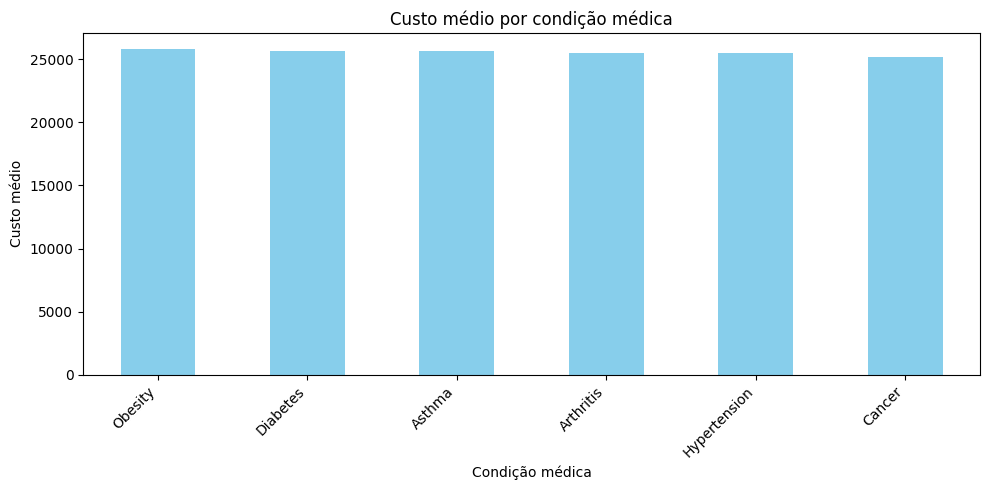

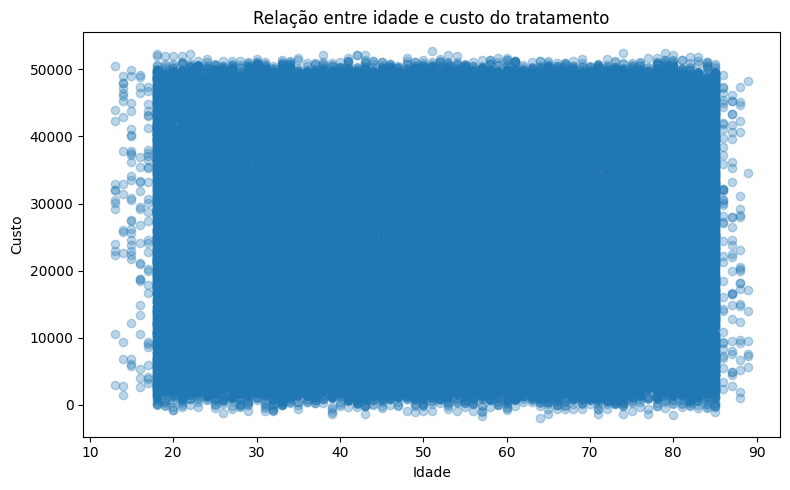

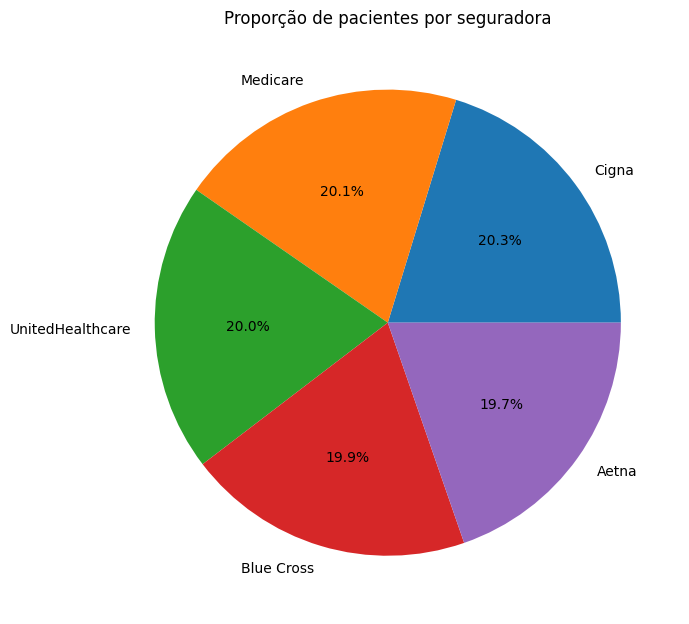

In [5]:
import matplotlib.pyplot as plt

# Padronizar nomes das colunas
df_feat.columns = (
    df_feat.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

def check_cols(cols, df):
    return all(c in df.columns for c in cols)


# 1) Custo médio por condição médica
needed = ["medical_condition", "billing_amount"]
if check_cols(needed, df_feat):

    agg = (
        df_feat.groupby("medical_condition")["billing_amount"]
        .mean()
        .sort_values(ascending=False)
    )

    plt.figure(figsize=(10,5))
    agg.plot(kind="bar", color="skyblue")
    plt.title("Custo médio por condição médica")
    plt.xlabel("Condição médica")
    plt.ylabel("Custo médio")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

else:
    print(f"❌ Colunas ausentes: {needed}")


# 2) Dispersão idade x custo
needed = ["age", "billing_amount"]
if check_cols(needed, df_feat):

    plt.figure(figsize=(8,5))
    plt.scatter(df_feat["age"], df_feat["billing_amount"], alpha=0.3)
    plt.title("Relação entre idade e custo do tratamento")
    plt.xlabel("Idade")
    plt.ylabel("Custo")
    plt.tight_layout()
    plt.show()

else:
    print(f"❌ Colunas ausentes: {needed}")


# 3) Proporção por seguradora
needed = ["insurance_provider"]
if check_cols(needed, df_feat):

    counts = df_feat["insurance_provider"].value_counts()

    plt.figure(figsize=(7,7))
    counts.plot(kind="pie", autopct="%1.1f%%", textprops={"fontsize": 10})
    plt.title("Proporção de pacientes por seguradora")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

else:
    print(f"❌ Colunas ausentes: {needed}")


C:\Users\Lucas\AppData\Local\Temp\ipykernel_53936\302950912.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_feat.groupby("age_group")["billing_amount"]


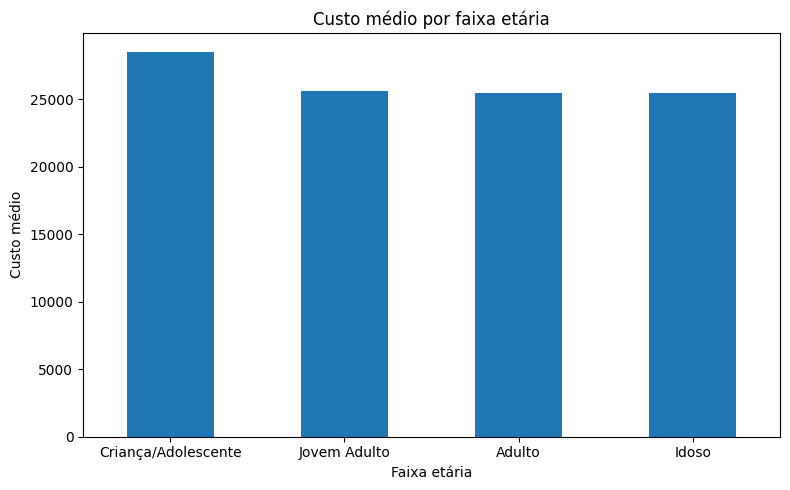

In [6]:
import matplotlib.pyplot as plt

need = {"age_group","billing_amount"}
if need.issubset(df_feat.columns):
    avg_cost_age = (
        df_feat.groupby("age_group")["billing_amount"]
        .mean()
        .reindex(["Criança/Adolescente","Jovem Adulto","Adulto","Idoso"])
    )
    plt.figure(figsize=(8,5))
    avg_cost_age.plot(kind="bar")
    plt.title("Custo médio por faixa etária")
    plt.xlabel("Faixa etária")
    plt.ylabel("Custo médio")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("Faltam colunas:", need - set(df_feat.columns))


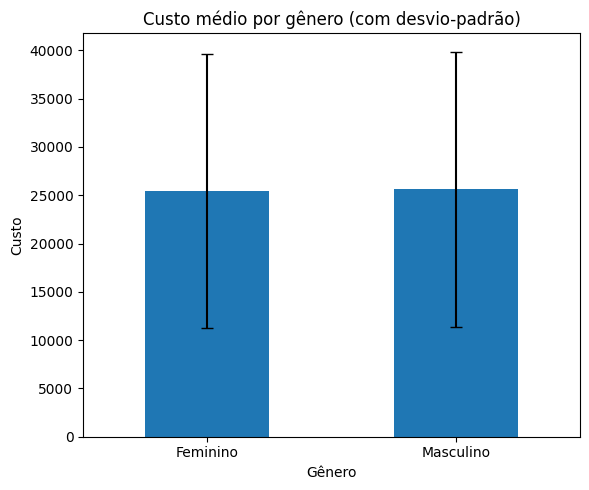

In [7]:
need = {"gender","billing_amount"}
if need.issubset(df_feat.columns):
    g = df_feat.groupby("gender")["billing_amount"]
    means = g.mean()
    stds  = g.std()

    plt.figure(figsize=(6,5))
    means.plot(kind="bar", yerr=stds, capsize=4)
    plt.title("Custo médio por gênero (com desvio-padrão)")
    plt.xlabel("Gênero")
    plt.ylabel("Custo")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("Faltam colunas:", need - set(df_feat.columns))


## 6) Conclusão e Entrega Final

### Relatório Final (Markdown)

O relatório completo deste mini-projeto está disponível no arquivo abaixo:

👉 [Clique aqui para abrir o relatorio_clamed.md](relatorio_clamed.md)


In [ ]:
# Export opcional do dataset limpo/enriquecido
OUTPUT_PATH = 'healthcare_dataset_clean_enriched.csv'
df_feat.to_csv(OUTPUT_PATH, index=False)
print('Arquivo salvo em:', OUTPUT_PATH)